In [1]:
import numpy as np
import pandas as pd
import GPy
from matplotlib import pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [11]:
points = pd.read_csv("Output/sr_ideal_opt_grid_search_all_ens.csv", usecols=["x", "d"]).to_numpy()

x_all = points[:,0]
d_all = points[:,1]

rng = np.random.default_rng()
points = rng.choice(points, 60, replace=False)
x = points[:, 0].reshape((points.shape[0], 1))
d = points[:, 1].reshape((points.shape[0], 1))
#d = d/1e10

GP_regression.,value,constraints,priors
rbf.variance,158.0,+ve,
rbf.lengthscale,1.0,+ve,
Gaussian_noise.variance,0.1,+ve,


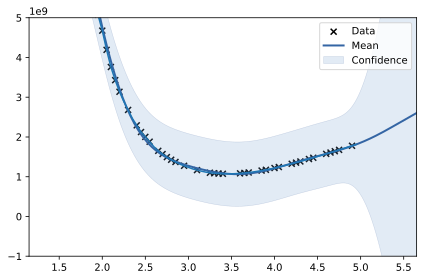

In [3]:
kernel = GPy.kern.RBF(input_dim=1, variance = 158)
ker2 = GPy.kern.White(input_dim=1)
#ker2 = GPy.kern.Linear(input_dim=1)
#kernel = ker1 * ker2
m = GPy.models.GPRegression(x,d,kernel, normalizer=True)
m.Gaussian_noise.variance = 0.1
m.plot()
plt.plot(x_all, d_all)
#plt.xlim(1.5, 5)
plt.ylim(-0.1e10, 0.5e10)
m

# New heading

(-1000000000.0, 5000000000.0)

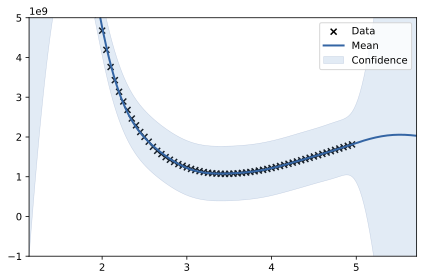

In [121]:
m.optimize()
m.Gaussian_noise.variance = 0.1
m.plot()
plt.ylim(-0.1e10, 0.5e10)


In [32]:
print(m[''])

  index  |         GP_regression.ExpQuad.variance  |  constraints  |  priors
  [0]    |                             2.38949864  |      +ve      |        
  -----  |      GP_regression.ExpQuad.lengthscale  |  -----------  |  ------
  [0]    |                             1.02501223  |      +ve      |        
  -----  |  GP_regression.Gaussian_noise.variance  |  -----------  |  ------
  [0]    |                             0.00000096  |      +ve      |        


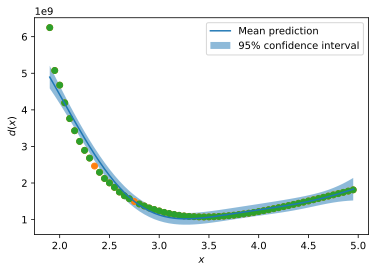

In [12]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel

ker = RBF(length_scale=1) + ConstantKernel(constant_value=1)
gpr = GaussianProcessRegressor(kernel=ker, alpha=.1, random_state=None, normalize_y=True, optimizer=None)
gpr.fit(x.reshape(-1,1), d.reshape(-1,1))

m, std = gpr.predict(x_all.reshape(-1,1), return_std=True)
m = m.ravel()
std = std.ravel()

plt.plot(x_all, m, label="Mean prediction")
plt.fill_between(
    x_all.ravel(),
    m - 1.96 * std,
    m + 1.96 * std,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$d(x)$")
plt.scatter(x_all, d_all)
plt.scatter(x, d)

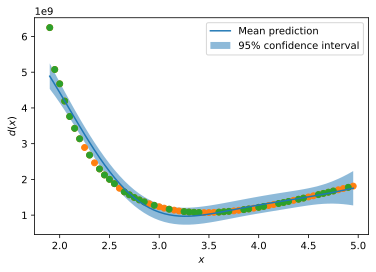

In [10]:
ker = RBF(length_scale=1)
const_ker = ConstantKernel(constant_value=1)
gpr = GaussianProcessRegressor(kernel=ker, alpha=0.1, random_state=None, normalize_y=True, optimizer=None)
gpr.fit(x.reshape(-1,1), d.reshape(-1,1))

m, std = gpr.predict(x_all.reshape(-1,1), return_std=True)
m = m.ravel()
std = std.ravel()

plt.plot(x_all, m, label="Mean prediction")
plt.fill_between(
    x_all.ravel(),
    m - 1.96 * std,
    m + 1.96 * std,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$d(x)$")
plt.scatter(x_all, d_all)
plt.scatter(x, d)

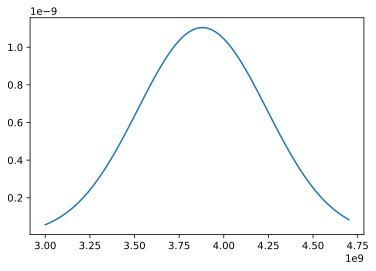

In [128]:
import scipy.stats as stats

f = np.linspace(3e9, 4.7e9, 100)
plt.plot(f, stats.norm.pdf(f, m[0], std[0]))